# Inference for SPIN

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import matplotlib.pyplot as plt

import torch
from PIL import Image
from models.hourglas_spin import HourglassNet

In [3]:
model_path = "/Users/alexanderveicht/Desktop/Coding/cil-road-segmentation.nosync/checkpoints/cil-dg-100-22-07-22/checkpoints/best_model.pth"

# Load Model and Test Iference

In [4]:
channel_mean = [125.78279375, 130.15193705, 130.92051354]
channel_std = [52.71067801, 49.9758017,  48.39758796]

In [5]:
def normalize_img(img):    
    img = np.array(img, dtype=np.float32)
    for c in range(3):
        img[:, :, c] = (img[:, :, c] - channel_mean[c]) / channel_std[c]

    # plt.imshow((img-np.min(img) / (np.max(img)-np.min(img))))
    # plt.show()

    return img

def denormalize_img(img):    
    img = np.array(img, dtype=np.float32)
    for c in range(3):
        img[:, :, c] = (img[:, :, c] * channel_std[c]) + channel_mean[c]

    # plt.imshow(np.array(img, dtype=np.uint8))
    # plt.show()

    return img

def plot_inference(model, img):
    img_norm = normalize_img(img)
    img_tens = torch.tensor(img_norm).permute(2, 0, 1).unsqueeze(0)
    mask = model(img_tens)[0][-1].softmax(axis=1).argmax(axis=1)[0, :, :].numpy()

    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    ax[0].imshow(np.array(img, dtype=np.uint8))
    ax[1].imshow(mask, cmap="gray")

    img[mask == 0] = img[mask == 0] * 0.5
    ax[2].imshow(np.array(img, dtype=np.uint8))

    ax[0].set_title("Image")
    ax[1].set_title("Mask")
    ax[2].set_title("Masked Image")


    plt.show()

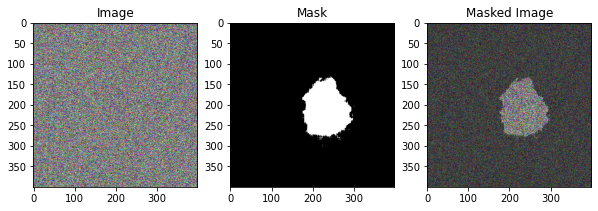

In [6]:
state_dict = torch.load(model_path, map_location=torch.device("cpu"))
model = HourglassNet()
model.load_state_dict(state_dict=state_dict)
model.eval()
x = torch.tensor(np.random.random(size=(400, 400, 3)), dtype=torch.float32) * 255

plot_inference(model, x)

# Load Test Images

In [7]:
img_path = "/Users/alexanderveicht/Desktop/Coding/cil-road-segmentation.nosync/data/CIL-dataset/test/images" # test images
# img_path = "/Users/alexanderveicht/Desktop/Coding/cil-road-segmentation.nosync/data/CIL-dataset/trainig/images" # train images
fnames = os.listdir(img_path)

fnames[:5]

['satimage_96.png',
 'satimage_82.png',
 'satimage_55.png',
 'satimage_41.png',
 'satimage_69.png']

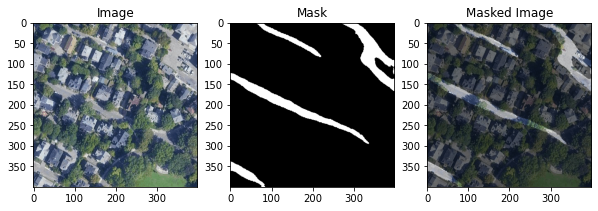

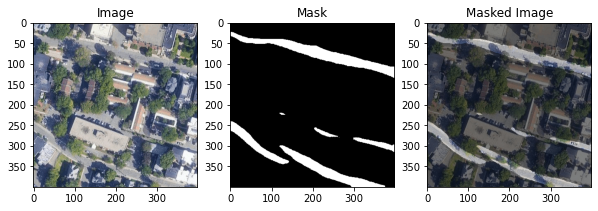

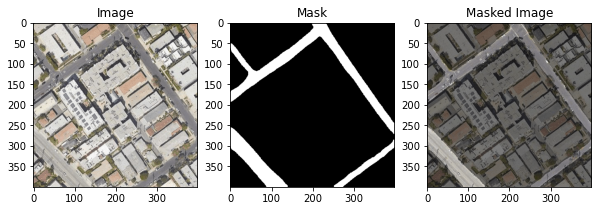

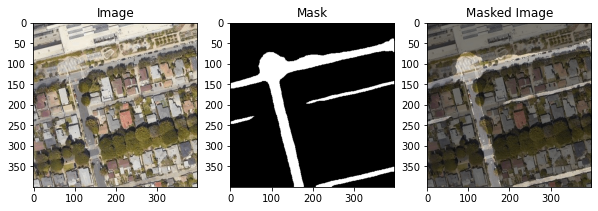

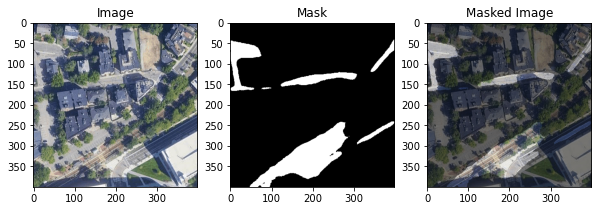

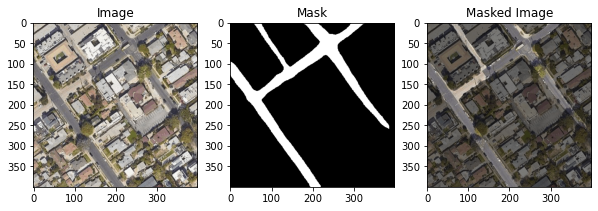

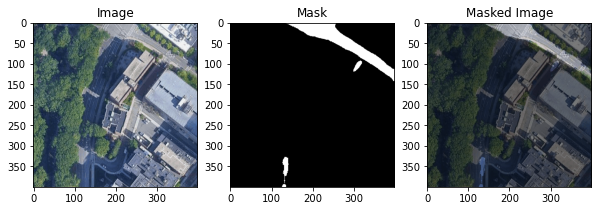

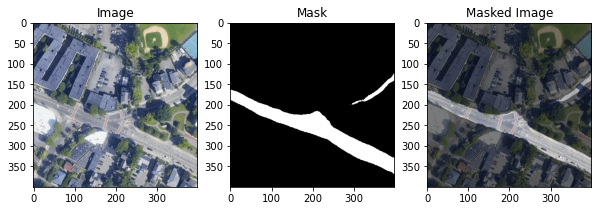

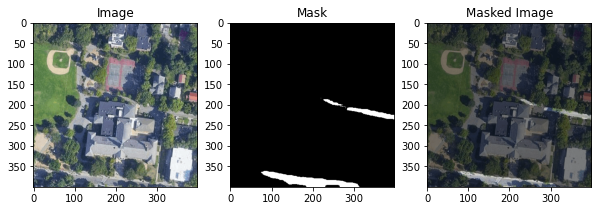

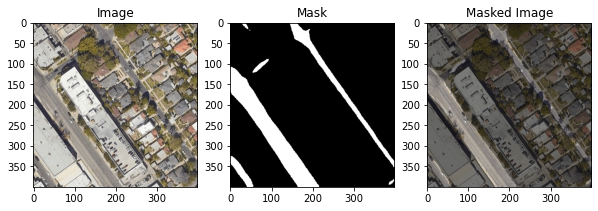

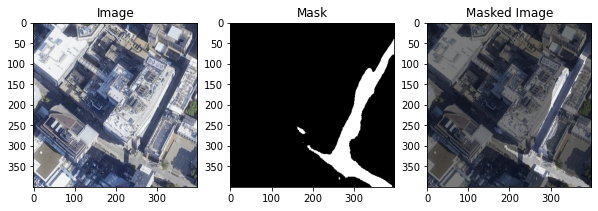

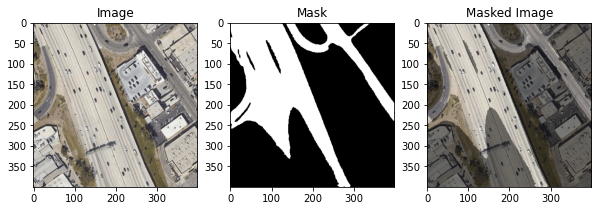

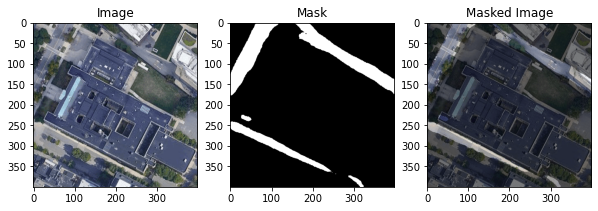

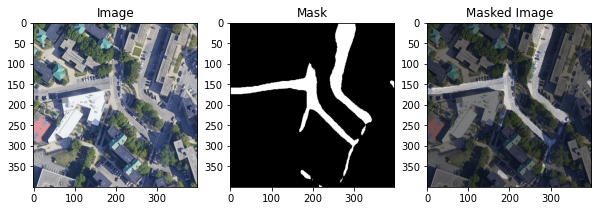

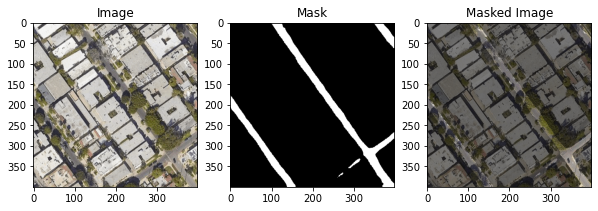

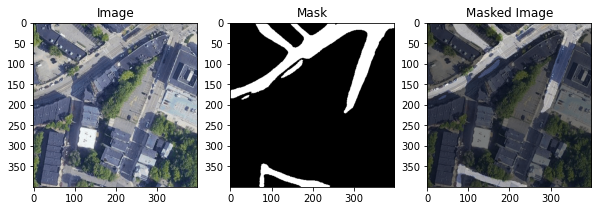

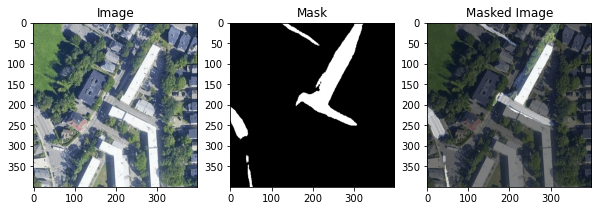

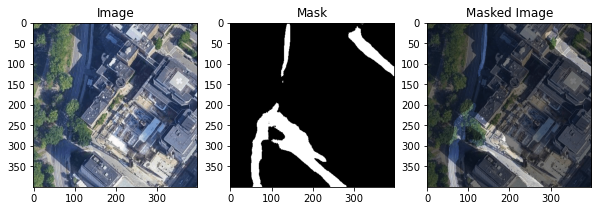

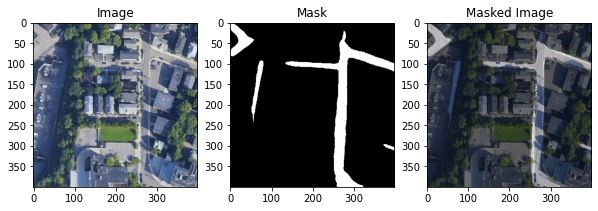

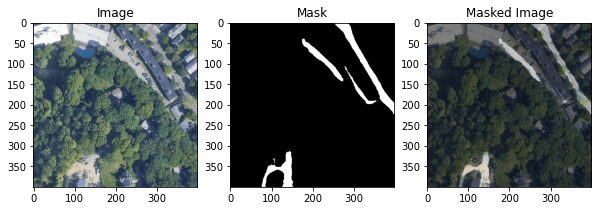

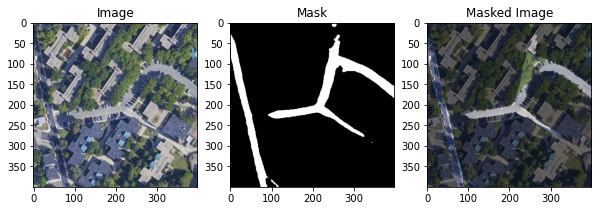

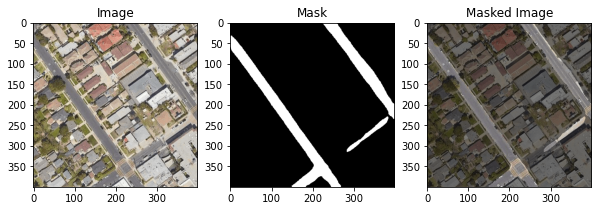

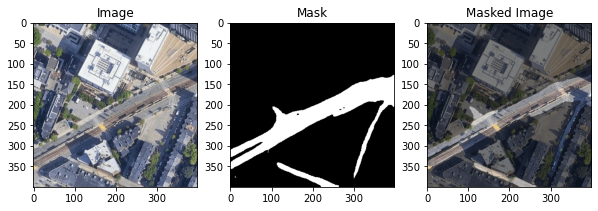

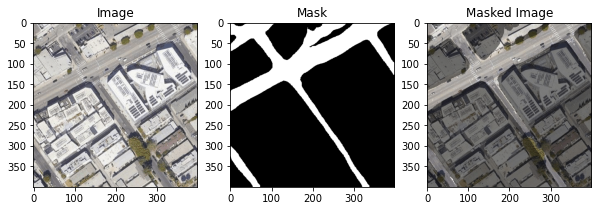

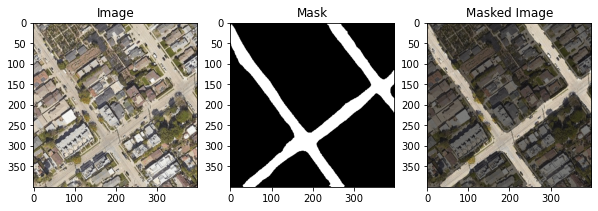

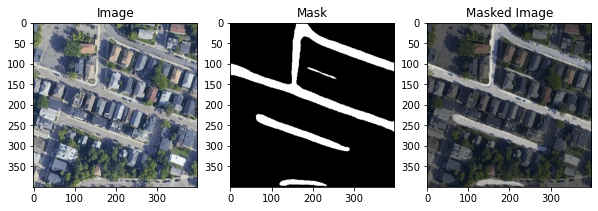

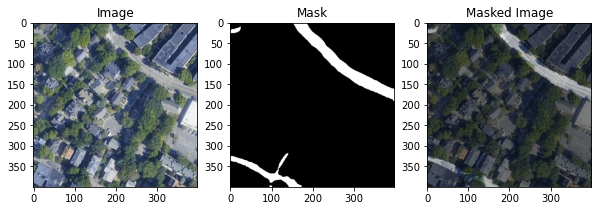

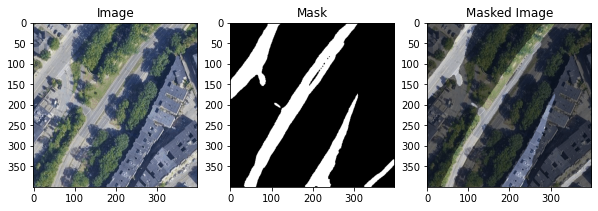

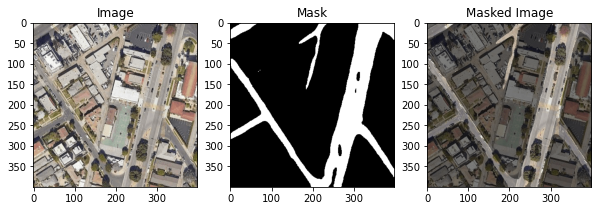

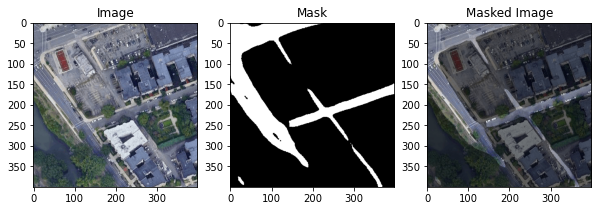

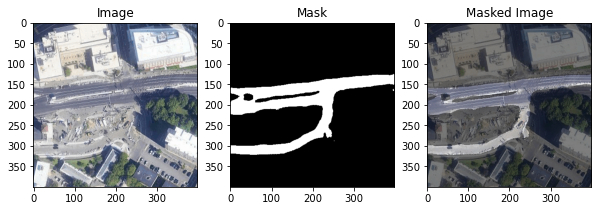

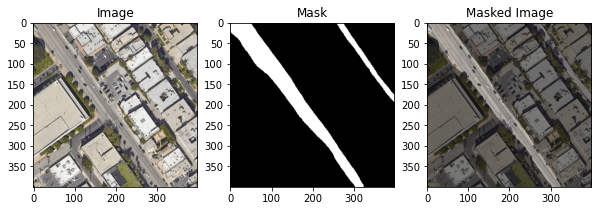

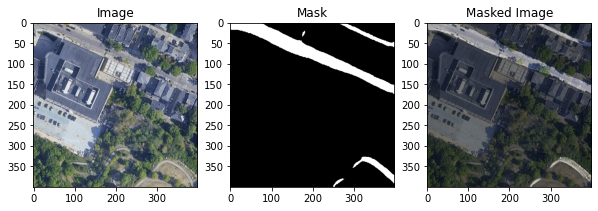

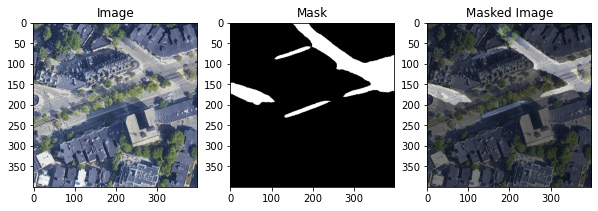

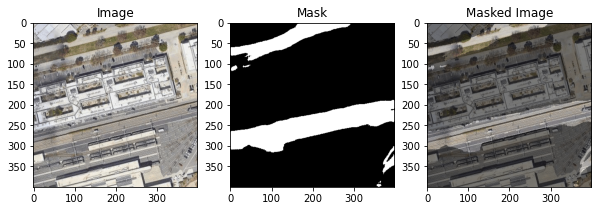

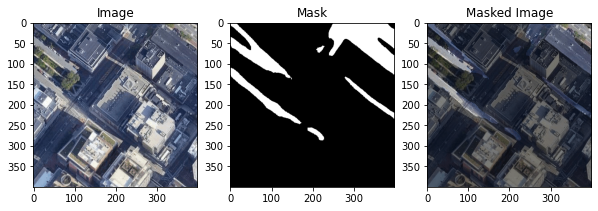

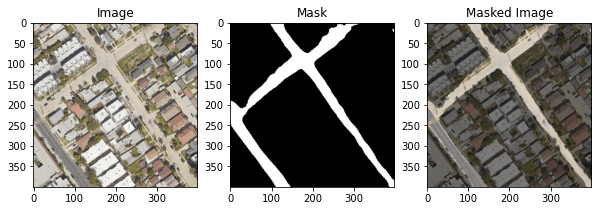

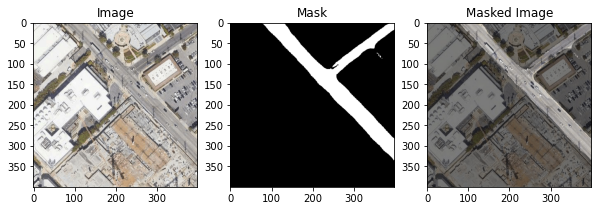

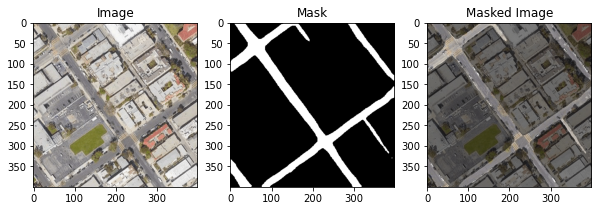

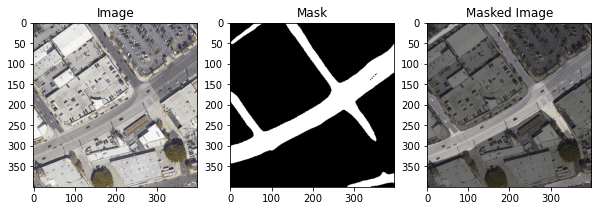

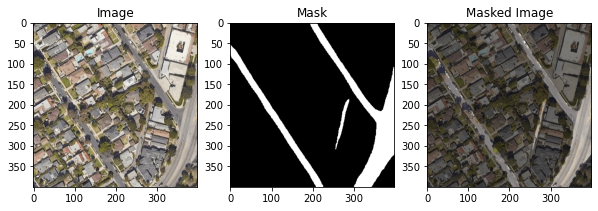

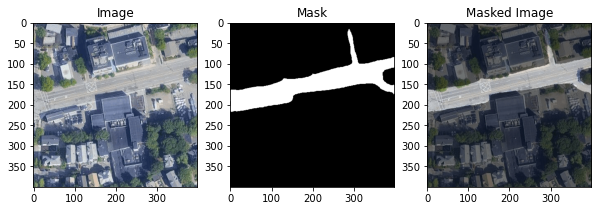

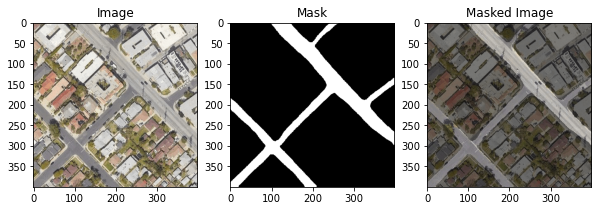

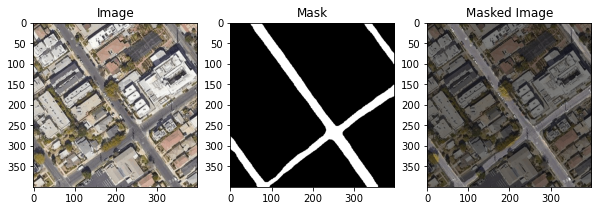

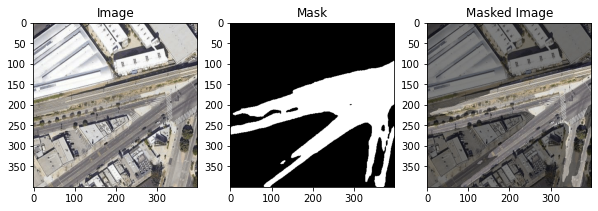

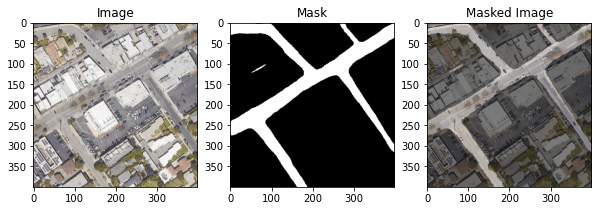

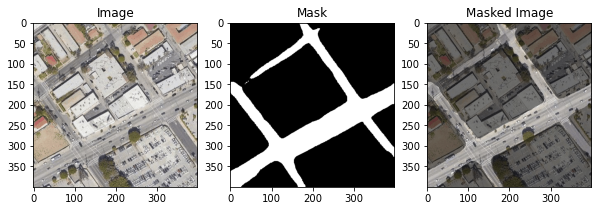

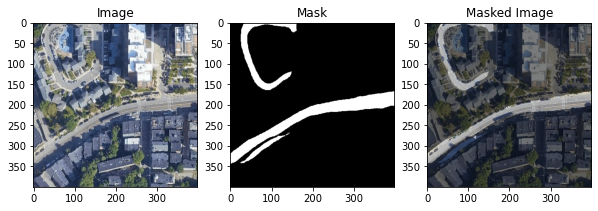

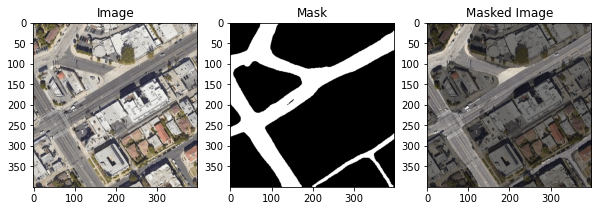

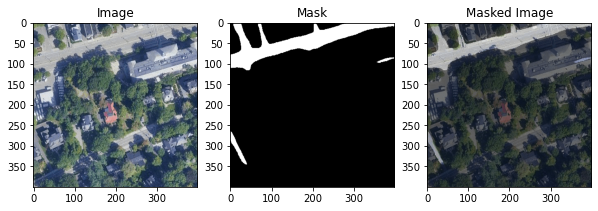

In [8]:
for idx in range(50):
    img = Image.open(os.path.join(img_path, fnames[idx])).convert("RGB")
    img = np.array(img)
    plot_inference(model, img)